<a href="https://colab.research.google.com/github/JamesChung821/python/blob/master/%E3%80%8CNormalization_and_whitening_ipynb%E3%80%8D%E7%9A%84%E5%89%AF%E6%9C%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Alex Belianinov
#Sandia National Laboratory
#Ion Beam Laboratory

### Normalizaiton & Whitening Processing Example

In [ ]:
from sklearn import preprocessing #data processing module
import numpy as np #fast math
from matplotlib import pyplot as plt #plotting utilities 

In [ ]:
plt.rcParams['figure.figsize'] = [12, 7] #figure size

In [ ]:
x = np.linspace(-100, 100, num=101, endpoint=True) #make an array with 101 elements from -100 to 100
print(x)
print(len(x))

[-100.  -98.  -96.  -94.  -92.  -90.  -88.  -86.  -84.  -82.  -80.  -78.
  -76.  -74.  -72.  -70.  -68.  -66.  -64.  -62.  -60.  -58.  -56.  -54.
  -52.  -50.  -48.  -46.  -44.  -42.  -40.  -38.  -36.  -34.  -32.  -30.
  -28.  -26.  -24.  -22.  -20.  -18.  -16.  -14.  -12.  -10.   -8.   -6.
   -4.   -2.    0.    2.    4.    6.    8.   10.   12.   14.   16.   18.
   20.   22.   24.   26.   28.   30.   32.   34.   36.   38.   40.   42.
   44.   46.   48.   50.   52.   54.   56.   58.   60.   62.   64.   66.
   68.   70.   72.   74.   76.   78.   80.   82.   84.   86.   88.   90.
   92.   94.   96.   98.  100.]
101


In [ ]:
y = np.cos(-x**2/2.0 + 5*x - 3) #some funky function
print(y)
print(len(y))

[ 0.47983553 -0.15380468 -0.04908513 -0.89615829  0.10999775 -0.4556203
  0.0224884  -0.98117544  0.43247694  0.36759972 -0.91840209 -0.3255248
 -0.82417772  0.67982456 -0.32603779  0.76525884 -0.93792158 -0.6467584
 -0.61968624 -0.24078351 -0.29196583 -0.48731929 -0.824246   -0.99984597
  0.97559623  0.24942335  0.99118685 -0.98112884 -0.94395429 -0.1543408
 -0.67344031 -0.69918616 -0.04872383 -0.98732971 -0.90371802  0.98279072
  0.59843592  0.97159932 -0.85323583 -1.          0.16296104 -0.86230361
 -0.8711326   0.21510527 -0.99608784 -0.78223089  0.92175127  0.7421542
  0.91474236 -0.75968791 -0.9899925   0.28366219 -0.91113026 -0.91113026
  0.28366219 -0.9899925  -0.75968791  0.91474236  0.7421542   0.92175127
 -0.78223089 -0.99608784  0.21510527 -0.8711326  -0.86230361  0.16296104
 -1.         -0.85323583  0.97159932  0.59843592  0.98279072 -0.90371802
 -0.98732971 -0.04872383 -0.69918616 -0.67344031 -0.1543408  -0.94395429
 -0.98112884  0.99118685  0.24942335  0.97559623 -0.9998

Text(0.5, 1.0, 'Original Data')

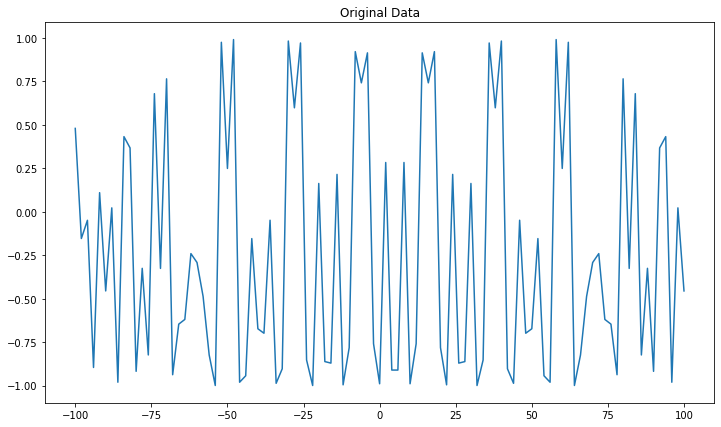

In [ ]:
plt.plot(x, y)
plt.title('Original Data')

### Standardization, or mean removal

In [ ]:
scaled_data = preprocessing.scale(y) #standardizes data

In [ ]:
print(scaled_data.mean(axis=0)) #showing that the standardization has made the mean approximately 0
print(scaled_data.std(axis=0)) # and the standard deviation 1

-1.0992307174506501e-17
1.0


[ 1.04730072  0.12931209  0.28102494 -0.94617549  0.51149686 -0.30794442
  0.38471735 -1.0693444   0.9786898   0.88469868 -0.97840128 -0.11946807
 -0.84189336  1.33703558 -0.12021127  1.46080881 -1.00668021 -0.58485646
 -0.54563556  0.00330119 -0.07084939 -0.35386845 -0.84199228 -1.09639339
  1.7655359   0.71349022  1.78812287 -1.06927689 -1.01542012  0.12853539
 -0.62351198 -0.66081136  0.28154838 -1.07826042 -0.95712767  1.77595895
  1.21912349  1.75974537 -0.88399141 -1.09661655  0.58822762 -0.89712839
 -0.90991942  0.66377177 -1.09094879 -0.78112273  1.68752781  1.42733588
  1.67737363 -0.74846351 -1.08211814  0.76309386 -0.96786618 -0.96786618
  0.76309386 -1.08211814 -0.74846351  1.67737363  1.42733588  1.68752781
 -0.78112273 -1.09094879  0.66377177 -0.90991942 -0.89712839  0.58822762
 -1.09661655 -0.88399141  1.75974537  1.21912349  1.77595895 -0.95712767
 -1.07826042  0.28154838 -0.66081136 -0.62351198  0.12853539 -1.01542012
 -1.06927689  1.78812287  0.71349022  1.7655359  -1

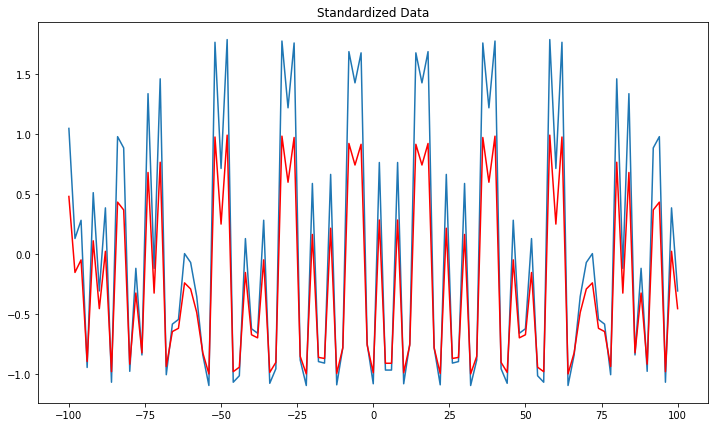

In [ ]:
plt.plot(x, scaled_data, x, y, 'r')
plt.title('Standardized Data')
print(scaled_data)

### Normalization
* Process of scaling individual samples to have unit norm. This process can be useful if you plan to use a quadratic form such as the dot-product or any other kernel to quantify the similarity of any pair of samples.

In [ ]:
y = y.reshape(-1,1) #necessary for preprocessing.normalize

In [ ]:
y.shape

(101, 1)

In [ ]:
normalized_data = preprocessing.normalize(y, norm='l2')

In [ ]:
normalized_data.shape

(101, 1)

In [ ]:
y[1], normalized_data[1]

(array([-0.15380468]), array([-1.]))

Text(0.5, 1.0, 'Normalized Data')

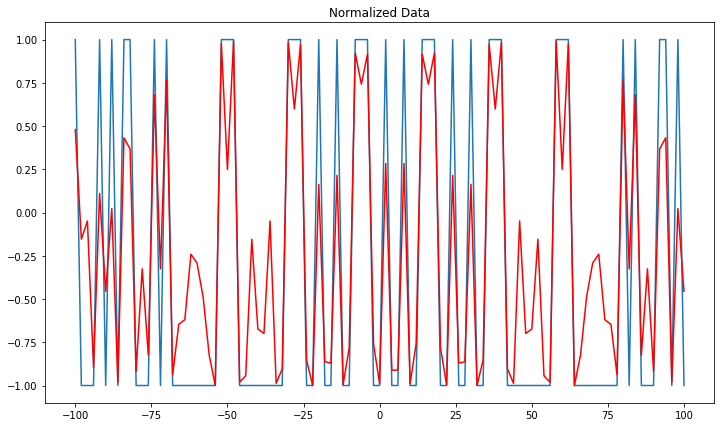

In [ ]:
plt.plot(x, normalized_data[0:], x, y, 'r') 
plt.title('Normalized Data')

### Whitening
* Normalize a group of observations on a per feature basis.

In [ ]:
from scipy.cluster.vq import whiten
whitened_data = whiten(y) # black box whitening

Text(0.5, 1.0, 'Whitened Data')

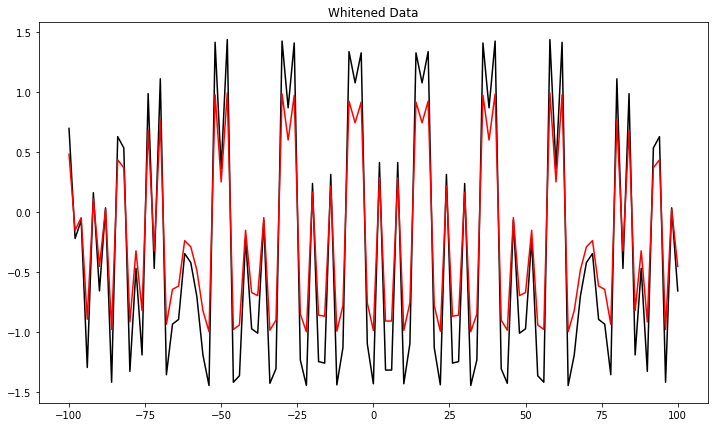

In [ ]:
plt.plot(x, whitened_data, 'k', x, y, 'r')

plt.title('Whitened Data')

In [ ]:
assert np.std( whitened_data ) == 1.0